In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir("/home/saumya/Documents/Spec_data/FINAL/Model_data/ICM")

In [4]:
pred = np.load('pred_vals_icm.npy')

In [5]:
pred

array([[7.14352814e+02, 5.90342904e-01, 4.39820394e+01],
       [6.15935382e+02, 7.52805863e-01, 2.63413627e+01],
       [4.63654640e+02, 6.16267115e-01, 1.29180016e+01],
       ...,
       [7.53401486e+02, 1.03962710e+00, 4.50653404e+01],
       [3.17843690e+02, 5.72690283e-01, 3.62075398e+01],
       [3.07917131e+02, 5.35628676e-01, 2.44486177e+01]])

In [6]:
true = np.load('true_vals_icm.npy')

In [7]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    for i in range(len(A2)):
        b = A1 + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))
        a.append(b)
    return(np.array(a))

In [9]:
x = np.linspace(0, 55, 1000)

In [10]:
Pred_pro = bolts(pred[:, 0], pred[:, 1], x, pred[:, 2])

/tmp/ipykernel_16601/4250135426.py:5: RuntimeWarning: overflow encountered in exp
  b = A1 + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))


In [11]:
True_pro = bolts(true[:, 0], true[:, 1], x, pred[:, 2])

In [43]:
true[:, 0]

array([714.25      , 616.33333333, 459.66666667, ..., 753.41666667,
       322.58333333, 303.        ])

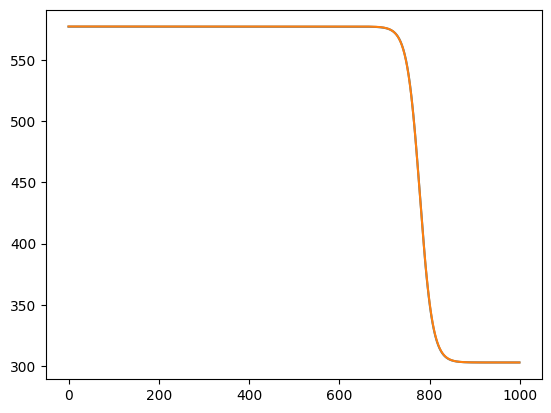

In [30]:
plt.plot(Pred_pro[100])
plt.plot(True_pro[100])

In [31]:
error_def = True_pro-Pred_pro

In [32]:
rms = []
for i in error_def:
    rms.append(np.sqrt(np.mean(i**2)))
rms = np.array(rms)

In [33]:
max(rms)

464.5813528468211

In [34]:
min(rms)

0.015840224199103338

In [35]:
np.sqrt(np.mean(rms**2))

36.98484410669678

In [36]:
#checking models now
import pickle

In [37]:
with open('gpr_ICM_Norm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [21]:
test_exp = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/test_hpu.npy')

In [22]:
test_exp_0 = np.load('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/FINAL_VISUAL/Exp_test.npy')

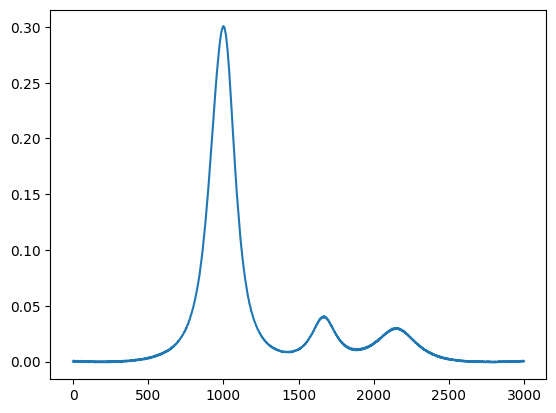

In [38]:
plt.plot(test_exp_0)

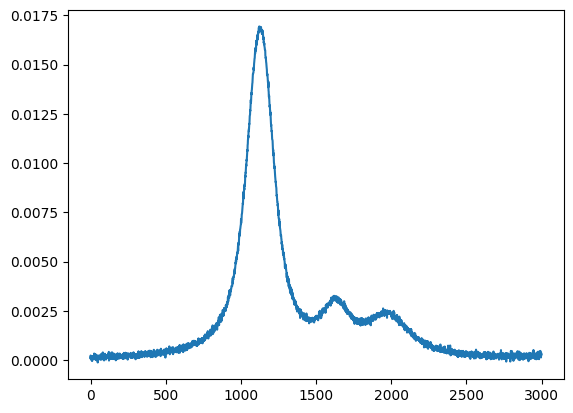

In [23]:
plt.plot(test_exp[0])

In [24]:
test_exp[0] = test_exp_0

In [25]:
# test_exp = test_exp/100

In [26]:
newX = test_exp

newX = np.concatenate((newX,np.zeros((np.shape(test_exp)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys_norm,var=loaded_model.predict(newX,Y_metadata=noise_dict)

In [27]:
ys_norm

array([[ 5.15212841e-24,  8.06036072e-22,  1.77463462e-24],
       [ 3.15216794e+00, -1.21233389e+02, -1.69378522e+01],
       [-8.98206419e+00, -1.41621996e+02, -1.72274922e+01],
       ...,
       [ 1.41877615e+01, -8.29583517e+01,  5.47375252e-01],
       [-1.90377988e+01, -1.41795904e+02,  1.37354789e+01],
       [ 8.86016517e+00, -8.32541136e+01, -4.76081081e+00]])

In [45]:
with open('ICM_A1.pkl', 'rb') as file:
    y_A1_T = pickle.load(file)


with open('ICM_A2.pkl', 'rb') as file:
    y_A2_T = pickle.load(file)

with open('ICM_A3.pkl', 'rb') as file:
    y_A3_T = pickle.load(file)    
    

In [46]:
temp = y_A1_T.inverse_transform(ys_norm[:,0].reshape(-1,1)).ravel()
A2 = y_A2_T.inverse_transform(ys_norm[:,1].reshape(-1,1)).ravel()
A3 = y_A3_T.inverse_transform(ys_norm[:,2].reshape(-1,1)).ravel()

In [49]:
temp[0], A2[0], A3[0]

(538.0, 0.55, 28.0)

In [28]:
np.zeros((np.shape(test_exp)[0],1)).shape

(2500, 1)

In [29]:
np.shape(test_exp)[0]

2500

In [50]:
def bolts_int(A2, A3, x, x_o):
    A1 = 303
    b = A1 + (A2-A1)/(1+np.exp((x-x_o)/A3))
    return b

In [51]:
x = np.linspace(0, 55, 1000)


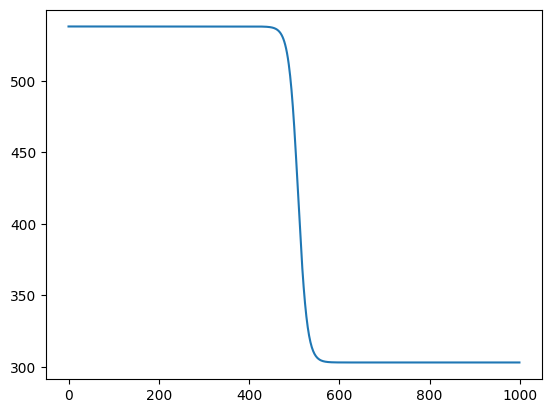

In [52]:
plt.plot(bolts_int(temp[0], A2[0], x, A3[0]))